<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/10_time_series_forecasting_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-07-25 08:22:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2021-07-25 08:22:50 (10.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd

df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"], index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


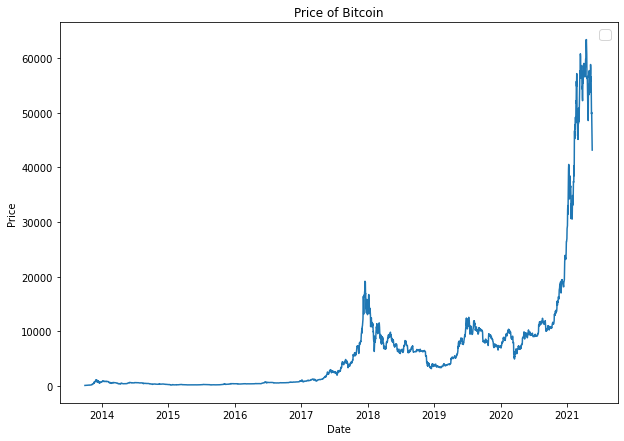

In [6]:
plt.figure(figsize=(10,7))
sns.lineplot(x=bitcoin_prices.index, y=bitcoin_prices["Price"], legend=True)
plt.title("Price of Bitcoin")
plt.legend(fontsize=14)

## Reading data with CSV modules

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader( f, delimiter = ",")
  next(csv_reader) #skip first line
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) 
    btc_price.append(float(line[2]))

In [8]:
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

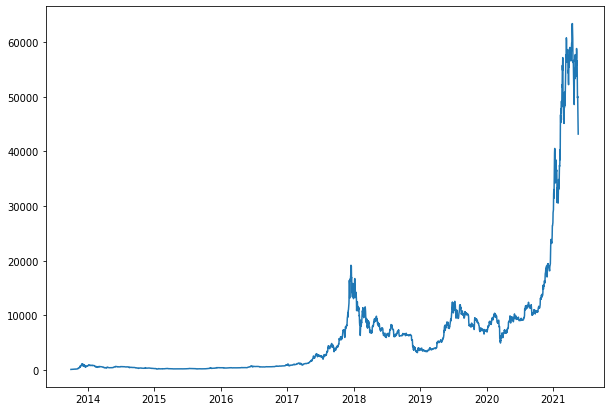

In [9]:
plt.figure(figsize=(10,7))
sns.lineplot(x=timesteps, y=btc_price)

## Create train & test set

In [10]:
split_size = int(0.8*len(btc_price)) # 80% train / 20% test
split_size

2229

In [11]:
X_train, y_train = timesteps[:split_size], btc_price[:split_size]
X_test, y_test = timesteps[split_size:], btc_price[split_size:]

len(X_train), len(X_test)

(2229, 558)

Text(0, 0.5, 'BTC Prices')

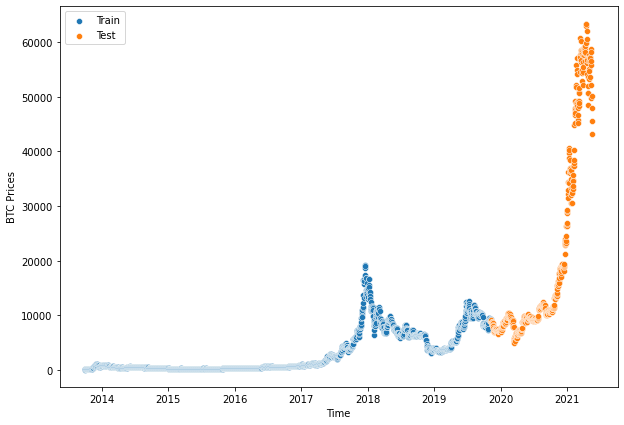

In [12]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_train,y=y_train, label="Train")
sns.scatterplot(x=X_test,y=y_test, label="Test")
plt.xlabel("Time")
plt.ylabel("BTC Prices")

## Naive Model

In [13]:
naive_forecast =y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

([9226.4858208826,
  8794.3586445233,
  8798.0420546256,
  9081.1868784913,
  8711.5343391679,
  8760.8927181435,
  8749.520591019,
  8656.970922354,
  8500.6435581622,
  8469.2608988992],
 [57107.1206718864,
  58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131])

Text(0, 0.5, 'BTC Prices')

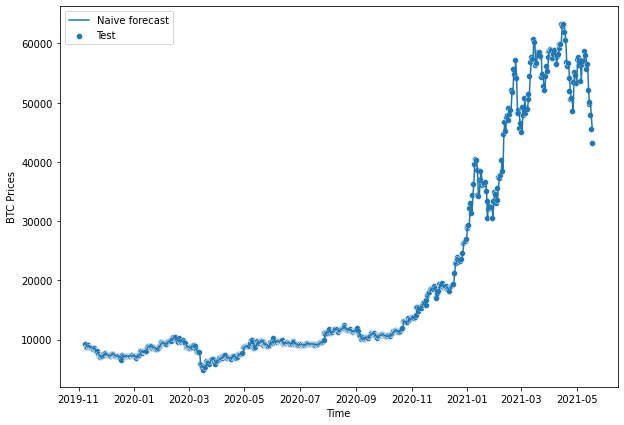

In [14]:
plt.figure(figsize=(10,7))
# sns.scatterplot(x=X_train,y=y_train, label="Train")
sns.scatterplot(x=X_test,y=y_test, label="Test")
sns.lineplot(x=X_test[1:], y=naive_forecast , label="Naive forecast")
plt.xlabel("Time")
plt.ylabel("BTC Prices")

In [15]:
## Evaluating a time series

In [16]:
import tensorflow as tf

In [17]:
import numpy as np
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):

  y_true = np.array(y_true)
  y_pred = np.array(y_pred)

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find the MAE of naive forecast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Our seasonlaity is 1 day (hence the shift of 1)

  return mae / mae_naive_no_season

In [18]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182626

In [19]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)

  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)

  rmse = tf.sqrt(mse)

  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}





In [64]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [21]:
tf.reduce_mean(y_test).numpy(), tf.reduce_max(y_test).numpy()

(20056.633, 63346.79)

## Format data - Windowing data

In [22]:
# Window size = 7, Horizon = 1
btc_price[:7], btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [23]:
btc_price[:8]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033]

In [108]:
HORIZON = 1
WINDOW_SIZE = 7

In [109]:
def get_labelled_window(x, horizon=HORIZON):

  return x[: , :-horizon], x[:, -horizon:]


In [110]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))

test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [111]:
tf.expand_dims(tf.range(8), axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [112]:
type(btc_price)

list

### Using numpy array indexing for creating Horizon & Window -  faster than Python for loops

In [113]:
def make_windows(x, window_size=WINDOW_SIZE, horizon= HORIZON):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon - 1)  ), axis=0).T

  # print(f"Window index:\n {window_indexes, window_indexes.shape}")

  x = np.array(x)

  windowed_array = x[window_indexes]

  windows, labels = get_labelled_window(windowed_array, horizon=HORIZON)


  return windows, labels

In [114]:
full_windows, full_labels = make_windows(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)

len(full_windows) , len(full_labels)

(2780, 2780)

In [115]:
full_windows[:3], full_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ]]), array([[123.033  ],
        [124.049  ],
        [125.96116]]))

In [116]:
# tf.keras.preprocessing.timeseries_dataset_from_array()

## Splitting window data in training & test

In [117]:
def make_train_test_splits(windows, labels, test_split = 0.2):

  split_size = int(len(windows) * (1-test_split) )

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels


In [118]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows),  len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [119]:
train_labels.shape

(2224, 1)

In [120]:
np.squeeze(train_labels).shape

(2224,)

## Make a modelling checkpoint callback

In [75]:
import os

# Create a function to implement a ModelCheckpoint callback


def create_model_checkpoint(model_name, save_path="model_experiment"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

## Model 1

In [76]:
# Dense Model -  Window = 7, Horizon = 1
from tensorflow.keras import layers
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
   layers.Dense(128, activation="relu"),
   layers.Dense(HORIZON, activation="linear")                                                          
], name = "model_1_dense")


# Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])
# Fit

history_model_1 = model_1.fit(x=train_windows, 
                              y=train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data = (test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
18/18 [==============================] - 1s 9ms/step - loss: 780.3469 - mae: 780.3469 - mse: 2312739.0000 - val_loss: 2279.5830 - val_mae: 2279.5830 - val_mse: 12772096.0000
INFO:tensorflow:Assets written to: model_experiment/model_1_dense/assets
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 247.6765 - mae: 247.6765 - mse: 285480.9688 - val_loss: 1005.9865 - val_mae: 1005.9865 - val_mse: 3441759.5000
INFO:tensorflow:Assets written to: model_experiment/model_1_dense/assets
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 188.4107 - mae: 188.4107 - mse: 171890.0469 - val_loss: 923.2859 - val_mae: 923.2859 - val_mse: 2868195.0000
INFO:tensorflow:Assets written to: model_experiment/model_1_dense/assets
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 169.4334 - mae: 169.4334 - mse: 151699.4219 - val_loss: 900.5932 - val_mae: 900.5932 - val_mse: 2683713.7500
INFO:tensorflow:Assets written to: model_experi

In [77]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 662.5319 - mae: 662.5319 - mse: 1358191.0000


[662.5319213867188, 662.5319213867188, 1358191.0]

In [78]:
model_1 = tf.keras.models.load_model("/content/model_experiment/model_1_dense")

model_1.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 1ms/step - loss: 568.5498 - mae: 568.5498 - mse: 1172588.0000


[568.5498046875, 568.5498046875, 1172588.0]

In [79]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Making forecast function

In [80]:
def make_preds(model, input_data):
  """
  Uses model to make prediction on input data
  """

  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [81]:
## Make predictions using model 1 
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8874.494, 8789.944, 9040.985, 8804.829, 8741.21 , 8749.836,
       8705.866, 8513.171, 8478.416, 8536.302], dtype=float32)>

In [84]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 568.5498,
 'mape': 2.549229,
 'mase': 0.99878454,
 'mse': 1172587.5,
 'rmse': 1082.8608}

In [85]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

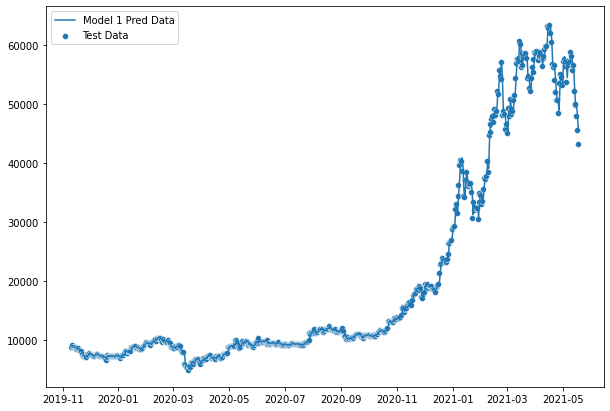

In [121]:
offset = 300
plt.figure(figsize=(10,7))
sns.scatterplot(x = X_test[-len(test_windows):], y = test_labels[:, 0],  label="Test Data")

sns.lineplot(x = X_test[-len(test_windows):], y = model_1_preds,  label="Model 1 Pred Data")

In [122]:

# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

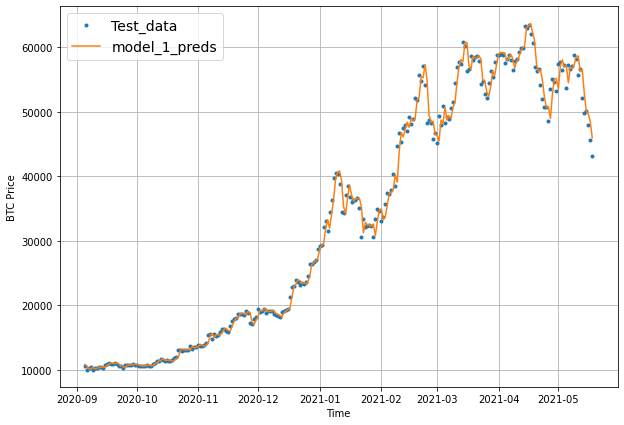

In [124]:

offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2

In [125]:
## Window size = 30, Horizon = 1

HORIZON = 1
WINDOW_SIZE = 30 

full_windows, full_labels = make_windows(btc_price, window_size=WINDOW_SIZE, horizon=HORIZON)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

len(train_windows), len(test_windows),  len(train_labels), len(test_labels)


(2205, 552, 2205, 552)

In [127]:
tf.random.set_seed(42)

# Create Model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data = (test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiment

In [129]:
model_2 = tf.keras.models.load_model("/content/model_experiment/model_2_dense")

model_2_preds = make_preds(model_2,test_windows )

model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)

model_2_results

{'mae': 608.848,
 'mape': 2.7680664,
 'mase': 1.0642722,
 'mse': 1284314.2,
 'rmse': 1133.2759}